In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Prepare Data
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Expand dimensions to match CNN input (grayscale images require shape (28, 28, 1))
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
# Print dataset shapes
print(f"Training data shape: {X_train.shape}")  # (60000, 28, 28, 1)
print(f"Training labels shape: {y_train.shape}")  # (60000, 10)
print(f"Test data shape: {X_test.shape}")  # (10000, 28, 28, 1)
print(f"Test labels shape: {y_test.shape}")  # (10000, 10)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


In [6]:
# Step 3: Build the CNN Model
model = Sequential()

In [7]:
# Input layer and first convolutional block
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Second convolutional block
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [9]:
# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(units=10, activation='softmax'))  # Output layer for 10 classes

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,618 (424.29 KB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 4: Train the Model
history = model.fit(X_train, y_train,
                    epochs=10,  # Reduced epochs to prevent overfitting
                    batch_size=64,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6513 - loss: 0.9758 - val_accuracy: 0.8441 - val_loss: 0.4385
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.8273 - loss: 0.4808 - val_accuracy: 0.8641 - val_loss: 0.3732
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.8548 - loss: 0.4071 - val_accuracy: 0.8737 - val_loss: 0.3382
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8644 - loss: 0.3757 - val_accuracy: 0.8841 - val_loss: 0.3186
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8762 - loss: 0.3462 - val_accuracy: 0.8852 - val_loss: 0.3071
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8817 - loss: 0.3305 - val_accuracy: 0.8872 - val_loss: 0.3014
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8870 - loss: 0.3147 - val_accuracy: 0.8928 - val_loss: 0.2893
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8898 - loss: 0.3007 - 

In [14]:
# Save the training history for analysis
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [15]:
# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8974 - loss: 0.2885
Test Loss: 0.2897
Test Accuracy: 89.69%


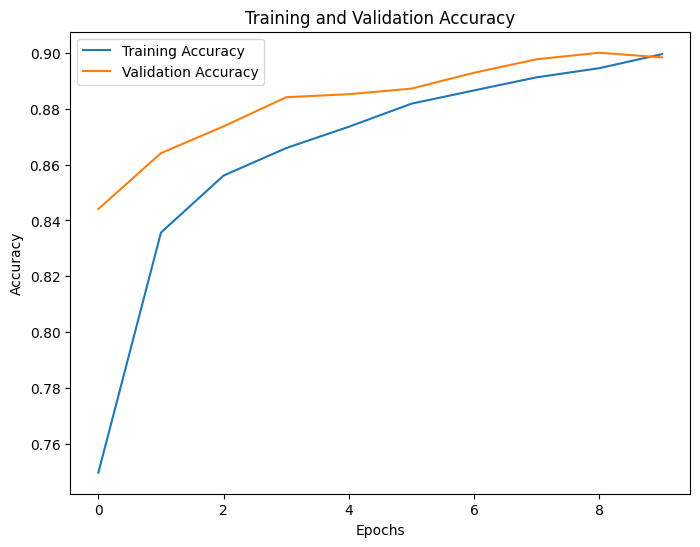

In [16]:
# Step 6: Plot Training History
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

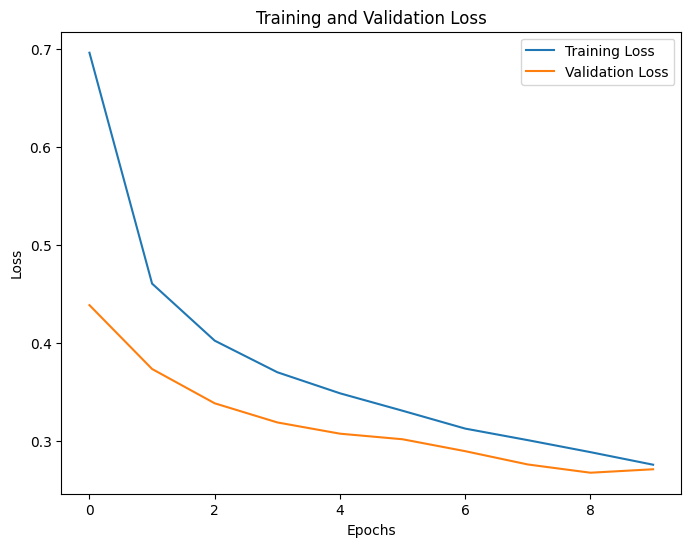

In [17]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Step 7: Predict on Test Data (Optional)
# Make predictions
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


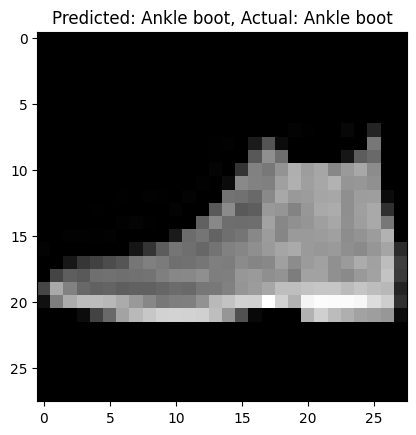

In [19]:
# Example: Display the first test image and predicted class
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {class_labels[np.argmax(predictions[0])]}, Actual: {class_labels[np.argmax(y_test[0])]}")

plt.show()